# Проект № 8

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

## Изучение данных

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats

In [2]:
df = pd.read_csv('/datasets/hypothesis.csv')
pd.options.display.max_colwidth = 100
df.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
df.columns = [x.lower().replace(' ', '_') for x in df.columns]

In [5]:
df.info() # проверяем

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [6]:
df.duplicated().sum()

0

### Вывод

В данном шаге мы изучили данные, ошибок в них. Изминили заголовки на "змеиный" регистр

## Приоритизация гипотез

### Фреймворк ICE

In [7]:
df['ICE'] = (df['impact'] * df['confidence']) / df['efforts']
df[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).round()

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


### Фреймворк RICE

In [8]:
df['RICE'] = (df['reach'] * df['impact'] * df['confidence']) / df['efforts']
df[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


### Вывод

Приоритезация изменилась. Но 3 важных гипотез сохранились(7, 6, 0) просто изменилс их приоритет. Так случилось, потому что параметр confidence равен 9, это больше, чем у других

## Анализ A/B-теста

Изучим результаты тестов

In [9]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [10]:
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Приведем  заголовки в нужный силь:

In [11]:
orders = orders.rename(columns={"transactionId":"transaction_id", "visitorId" : "visitor_id"})

In [12]:
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


Изменим тип даты на datetime

In [13]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [14]:
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Так как при A/B тестах - мы должны тестировать гипотезы на разных независимых группах, то проверим не пересекаются ли данные группы

In [15]:
intersected_orders = np.intersect1d(orders.query('group == "A"')['visitor_id'].unique(),
                                  orders.query('group == "B"')['visitor_id'].unique())
print(len(intersected_orders))
print(intersected_orders)

58
[   8300375  199603092  232979603  237748145  276558944  351125977
  393266494  457167155  471551937  477780734  818047933  963407295
 1230306981 1294878855 1316129916 1333886533 1404934699 1602967004
 1614305549 1648269707 1668030113 1738359350 1801183820 1959144690
 2038680547 2044997962 2378935119 2458001652 2579882178 2587333274
 2600415354 2654030115 2686716486 2712142231 2716752286 2780786433
 2927087541 2949041841 2954449915 3062433592 3202540741 3234906277
 3656415546 3717692402 3766097110 3803269165 3891541246 3941795274
 3951559397 3957174400 3963646447 3972127743 3984495233 4069496402
 4120364173 4186807279 4256040402 4266935830]


Вот и нашлись дубликаты. Создадим новый DateFrame без повторяющихся пользователей.

In [16]:
new_orders = orders.query('visitor_id not in @intersected_visitors')
len(new_orders['visitor_id'].unique())

973

In [17]:
print(new_orders.groupby('group').agg({'visitor_id' : 'nunique'}))
print(new_orders.groupby('group').agg({'visitor_id' : 'nunique'}).sum())

       visitor_id
group            
A             445
B             528
visitor_id    973
dtype: int64


Теперь все впорядке, можно работать с этими данными

In [18]:
new_orders['group'].unique() # посчитаем сколько групп в АВ-тесте

array(['B', 'A'], dtype=object)

In [19]:
new_orders['date'].min() #датa начала теста;

Timestamp('2019-08-01 00:00:00')

In [20]:
new_orders['date'].max() #датa окончания теста;

Timestamp('2019-08-31 00:00:00')

In [21]:
first = new_orders[['date', 'group']] 

### График кумулятивной выручки по группам

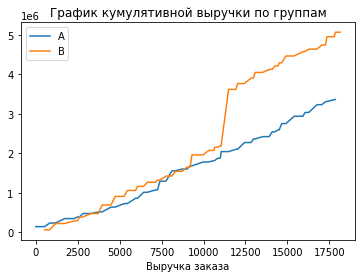

In [22]:
ordersAggregated = first.apply(
    lambda x: new_orders[
        np.logical_and(
            new_orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = first.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]


plt.plot(cumulativeRevenueA['revenue'], label='A')

plt.plot(cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по группам')

plt.xlabel('Выручка заказа')


plt.legend() 


Сегмент В в середине вырывается в  лидерство, а  сектор А плавно повышается.

In [23]:
new_orders.query('group == "B"and date > "2019-08-20"').sort_values(by='date').head(20)

,transaction_id,visitor_id,date,revenue,group
898,1035705992,1396482013,2019-08-21,17300,B
753,2271171213,2162167602,2019-08-21,19660,B
768,2102403691,2213855729,2019-08-21,2355,B
815,1722971027,1786280350,2019-08-21,250,B
840,234238251,2742574263,2019-08-21,9448,B
841,3730368751,1669393038,2019-08-21,10170,B
839,2368020497,2870367609,2019-08-21,1410,B
891,3608152685,3796654595,2019-08-21,3740,B
950,627172106,3074968175,2019-08-21,24350,B
945,1364984427,2010516786,2019-08-21,15485,B


И видимо, всвязи с дорогими заказами и редкими, сектор В и вырвался вперед

### График кумулятивного среднего чека по группам

Text(0.5, 0, 'Выручка заказа')

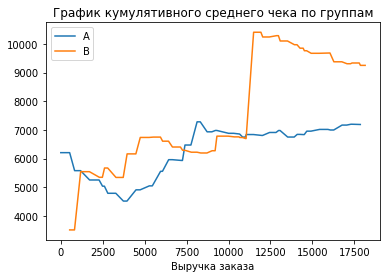

In [24]:
plt.plot(cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.title('График кумулятивного среднего чека по группам')

plt.xlabel('Выручка заказа')

По графику видно как колеблиться средний чек, но видно, что под конец сегиент В с большим отрывым "ведёт", но пока принимать решение еще рано

### График относительного изменения кумулятивного среднего чека группы B к группе A

In [25]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(
                                                  cumulativeRevenueB, 
                                                  left_on='date', 
                                                  right_on='date', 
                                                  how='left', 
                                                  suffixes=['A', 'B']
                                                  )


Text(0.5, 0, 'Дата, когда был совершён заказ')

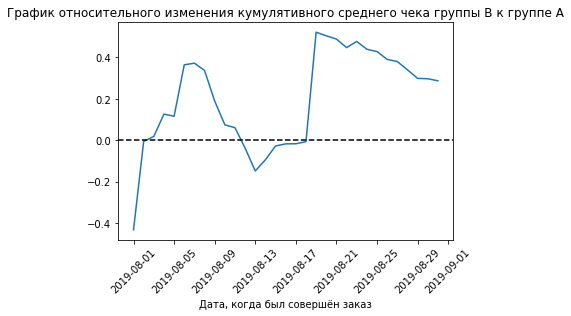

In [26]:
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation=45)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')

plt.xlabel('Дата, когда был совершён заказ')

Нагляднее видно, что средний чек достаточно сильно колебался в первой половине теста

### График кумулятивной конверсии по группам

In [27]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

Text(0.5, 0, 'Выручка заказа')

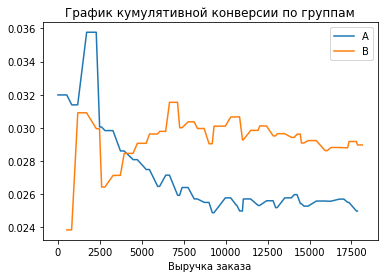

In [28]:
plt.plot(cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('График кумулятивной конверсии по группам')

plt.xlabel('Выручка заказа')

В начале теста сегмент А имел большую конверсию, но постепенно сегмент В выровнялся и зафиксировался примерно около одного значения, больше значения сегмента А.

### График относительного изменения кумулятивной конверсии группы B к группе A. 

In [29]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                            left_on='date', 
                            right_on='date', 
                            how='left', suffixes=['A', 'B'])


Text(0.5, 0, 'Дата заказа')

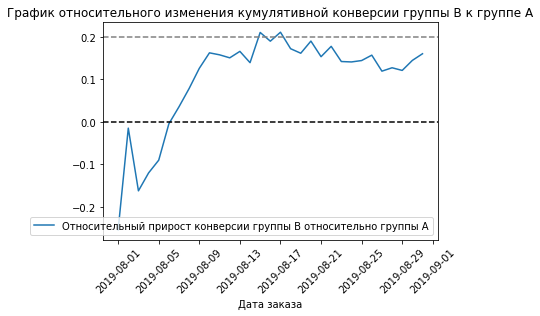

In [30]:
plt.plot( mergedCumulativeConversions['date'], 
   mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
   label="Относительный прирост конверсии группы B относительно группы A"
   )
plt.legend(loc = 'lower right')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.xticks(rotation=45)
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')

plt.xlabel('Дата заказа')

Ближе к середине сегмент В лидирует по конверсии, и зафиксирован прирост 20% относительно сегмент А 

### Tочечный график количества заказов по пользователям

Найдем число заказов по пользователям — создадим датафрейм c двумя столбцами: 'visitor_id' и 'orders'.

In [31]:
ordersByUsers = (
    new_orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers.columns = ['visitor_id', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,visitor_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


Text(0, 0.5, 'Cумма заказа')

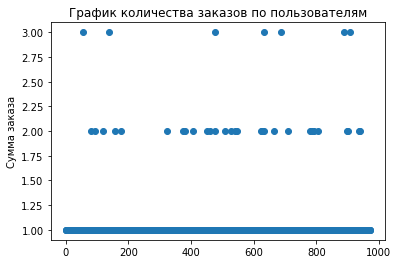

In [32]:
x_values = pd.Series(range(0,len(ordersByUsers))) #сгенерированные номера наблюдений

plt.scatter(x_values, ordersByUsers['orders']) 

x_values = pd.Series(range(0, len(ordersByUsers)))
plt.title('График количества заказов по пользователям')

plt.ylabel('Cумма заказа')

Пользователей заказавших больше 1 раза гораздо меньше, и как мы видим максимальное количество заказов всего 3 и таких пользователей очень мало. Это нехорошо. Большинство пользователей после первой покупки не совершают покупок больше, а после 2-х 3-й раз лишь единицы покупают. Возможно покупателей неустроило качество товара или сервиса. Может больший поток покупателей приходит на разовые большие скидки и акции, берет что-то нужное по большой скидке и больше не возвращается. Может стоить обратиться в службу поддержки или базу отзывов и узнать в чем причина?

### 95-й и 99-й перцентили количества заказов на пользователя

In [33]:
np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 1., 2.])

Не более 5% совершили больше 1 заказа  и не более 1% больше 2 заказов.

### Точечный график стоимостей заказов

In [34]:
new_orders.sort_values(by='revenue', ascending=False).head(10)

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A
949,1347999392,887908475,2019-08-21,60450,A
940,2420050534,4003628586,2019-08-08,58550,B
131,3163614039,2254586615,2019-08-22,53904,A


Text(0, 0.5, 'Выручка заказа')

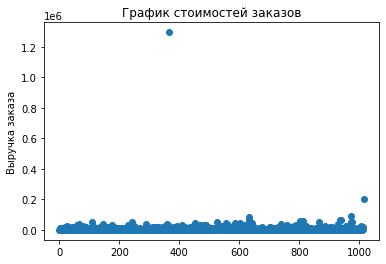

In [35]:
x_values = pd.Series(range(0, len(new_orders['revenue'])))
plt.scatter(x_values, new_orders['revenue'])
plt.title('График стоимостей заказов')

plt.ylabel('Выручка заказа')

Заказов стоимостью сыше 200 000 рублей не очень много. Есть выбросы в районе чуть выше 200000 рублей и в районе 1 200 000 рублей. Один заказ на 1 294 500	рублей  и один на 202 740 рублей выглядят странно.

Text(0, 0.5, 'Выручка заказа')

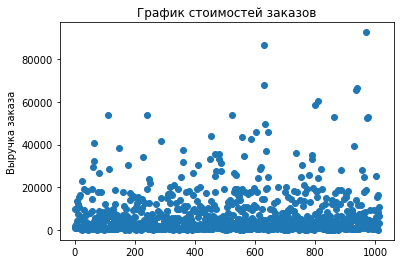

In [36]:
multiple = new_orders.query('revenue < 200000')

x_values = pd.Series(range(0, len(multiple['revenue'])))
plt.scatter(x_values, multiple['revenue'])
plt.title('График стоимостей заказов')

plt.ylabel('Выручка заказа')

### 95-й и 99-й перцентили стоимости заказов

In [37]:
np.percentile(new_orders['revenue'], [90, 95, 99])

array([17990., 26785., 53904.])

Не более 5% заказов дороже 26 785 рублей и не более 1% дороже 53 904 рублей

### Статистическая значимость различий в конверсии между группами по «сырым» данным

 Нулевая гипотеза Н0 - различий в конверсии между группами нет. 
 
 Альтернативная гипотеза Н1: различия в конверсии между группами есть.

In [38]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    new_orders[new_orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    new_orders[new_orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA =  (
    new_orders[new_orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    new_orders[new_orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("Значение р-value:", "{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Прирост конверсии группы В к конверсии группы А равен:", "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


Значение р-value: 0.01102
Прирост конверсии группы В к конверсии группы А равен: 0.160


P-value значительно меньше 0.05, потому нулевую гипотезу отвергаем. Анализ «сырых данных» сообщает, что в конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы В к конверсии группы А равен 16%. Может действительно группа В успешнее А.

### Статистическая значимость различий  в среднем чеке заказа между группами по «сырым» данным

Нулевая гипотеза Н0 - различий в конверсии между группами нет.

Альтернативная гипотеза Н1: различия в конверсии между группами есть.

In [39]:
print("Значение р-value:", '{0:.3f}'.format(stats.mannwhitneyu(new_orders[new_orders['group']=='A']['revenue'], 
                                          new_orders[new_orders['group']=='B']['revenue'])[1]))
print("Относительное различие среднего чека между группами:", 
      '{0:.3f}'.format(new_orders[new_orders['group']=='B']['revenue']
      .mean()/new_orders[new_orders['group']=='A']['revenue'].mean()-1))

Значение р-value: 0.829
Относительное различие среднего чека между группами: 0.287


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 

### Статистическую значимость различий в конверсии между группами по «очищенным» данным

Приступим к подготовке очищенных от аномалий данных

In [40]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 1]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 1]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
928     204675465
33      249864742
684     358944393
36      366673373
Name: visitor_id, dtype: int64
86


Всего 86 аномальных пользователей

Узнаем, как их действия повлияли на результаты теста:

In [41]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print("Значение р-value:", '{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Прирост конверсии группы В к конверсии группы А равен:", '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

Значение р-value: 0.01255
Прирост конверсии группы В к конверсии группы А равен: 0.180


Результаты по конверсии практически не изменились. Нулевую гипотезу отвергаем, относительный прирост конверсии группы В к конверсии группы А равен 16%(увеличился на 2%). Получилось так, потому что больше одного заказа совершало гораздо мало человек, поэтому и изменения незначительны.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [42]:
print("Значение р-value:", 
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            new_orders[
                np.logical_and(
                    new_orders['group'] == 'A',
                    np.logical_not(new_orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            new_orders[
                np.logical_and(
                    new_orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print("Относительное различие среднего чека между группами:", 
    "{0:.3f}".format(
        new_orders[
            np.logical_and(
                new_orders['group'] == 'B',
                np.logical_not(new_orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / new_orders[
            np.logical_and(
                new_orders['group'] == 'A',
                np.logical_not(new_orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

Значение р-value: 0.829
Относительное различие среднего чека между группами: -0.011


P-value практически не изменился, но разница между сегментами сократилась с 28.7% до -1.1%. Это связано с тем, что ушли аномально большие заказы, которые давали приемущество в среднем чеке по отношению к другой группе.

## Вывод

В данном проекте:

- Проведена приоритизация гипотез.

- На основе результатов теста были проведены исследования:

  - Построены графики, нужные для исследования и расчитанны 95-й и 99-й перцентили.
  
  - Проанализированны аномалии.
  
  В результате получены следующие выводы:

  - Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.

  - По сырым данным нет статистически значимого различия по среднему чеку между группами, так и после фильтрации аномалий.

  - График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.

  - График различия среднего чека колеблется: он-то и позволил найти аномалии. Сделать из этого графика определённые выводы нельзя.

На основе вс его перечисленного, можно принять решение о **завершение** теста, так как все важные этапы выполнены, и дальнейшее проведение эксперимента не отразится на принятии решении  A группа  уже не станет лучше группы B.
